# Sentiment Analysis

#### Imports

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import re
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

from utils_b import *
from path import path



### sent analysis

import nltk
import statistics

#Preprocessing: tokenization and lemmatization

from nltk.tokenize import PunktSentenceTokenizer
sent_tokenizer = PunktSentenceTokenizer()

#Sentiment Analysis with VADER
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentiment Analysis with TextBlob
# !pip install textblob
from textblob import TextBlob

#Regression Metrics
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Get the data

In [4]:
train_data = pd.read_csv(path + 'data_updated\\train.csv', index_col=-1)
# test_data = pd.read_csv(path + 'data_updated\\test.csv', index_col=-1)

#### Get a data copy

In [5]:
train = train_data.copy()

#### Dataset with just the lyrics

In [6]:
lyrics = train['lyrics'].copy()
lyrics

id
535805     When you said you loved me\nDid you mean it th...
7519483    Kid Naruto Rap\n[Hook]\nEverybody wants you to...
4892808    [Verse 1]\nPeople tell me I've changed\nI find...
1584150    You've been warned about me\nDon't try to get ...
7639050    [Verse 1]\nI can see the end is coming but I’v...
                                 ...                        
1702980    If I knew when I was young that I'd be older\n...
4802970    [Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...
403929     [Verse 1]\nI was born inside a home\nThe young...
1000723    Rollin' by the pool the falling stars are not ...
6177674    [Verse 1: GodlyRiskTaker A]\nYeah Epic Games, ...
Name: lyrics, Length: 134967, dtype: object

# Stopwords Polarity with vader

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
# stopwords

In [8]:
vader = SentimentIntensityAnalyzer()

In [9]:
sent_compound_list = []

for word in stopwords:
    sent_compound_list.append(vader.polarity_scores(word)["compound"])

polarity = np.array(sent_compound_list).mean()
polarity

0.0015413407821229048

como vimos na parte da classificacao, as stopwords tem bastante peso nas palavras + comuns e + relevantes, para alem disso .... polaridade neutra, ... por isso decidimos retira-las 

# Text Preprocessing

In [13]:
# preproc_with_emojis = text_preprocessing(train, 'lyrics', 'tag', apply_stopwords_removal=True, emojis_removal=False)
preproc_without_emojis = text_preprocessing(train, 'lyrics', 'tag', apply_stopwords_removal=True, emojis_removal=True)

# Log Ratio

### 1. With emojis

In [9]:
genre_percentages_with_emojis, genre_percentages_with_emojis_dict = genre_percentages(preproc_with_emojis)

In [12]:
genre_freqs_with_emojis, genre_freqs_inverted_with_emojis, overall_freq_with_emojis = genre_frequencies(preproc_with_emojis, genre_percentages_with_emojis, genre_percentages_with_emojis_dict)

In [ ]:
top_words_with_emojis = log_ratio(genre_freqs_with_emojis, genre_percentages_with_emojis, total_words=2000)

# # Print top words for each genre
# for genre, words in top_words_with_emojis.items():
#     print(f'Top words for {genre}: {words}')

# print("\n")
top_words_inverted_with_emojis = log_ratio(genre_freqs_inverted_with_emojis, genre_percentages_with_emojis, total_words=2000)

# # Print top words for each genre
# for genre, words in top_words_inverted_with_emojis.items():
#     print(f'Top words for {genre}: {words}')

In [14]:
relevant_words_with_emojis = [word for sublist in top_words_with_emojis.values() for word, _ in sublist]
relevant_words_inverted_with_emojis = [word for sublist in top_words_inverted_with_emojis.values() for word, _ in sublist]

most_common_words_with_emojis = [pair[0] for pair in overall_freq_with_emojis.most_common(2000)]
# common_words_not_chosen = [word for word in most_common_words if word not in relevant_words]
# words_to_use = relevant_words + common_words_not_chosen

### 2. Without emojis

In [14]:
genre_percentages_without_emojis, genre_percentages_without_emojis_dict = genre_percentages(preproc_without_emojis)

In [15]:
genre_freqs_without_emojis, genre_freqs_inverted_without_emojis, overall_freq_without_emojis = genre_frequencies(preproc_without_emojis, genre_percentages_without_emojis, genre_percentages_without_emojis_dict)

In [93]:
top_words_without_emojis = log_ratio(genre_freqs_without_emojis, genre_percentages_without_emojis, total_words=2000)

# # Print top words for each genre
# for genre, words in top_words_without_emojis.items():
#     print(f'Top words for {genre}: {words}')

# print("\n")
top_words_inverted_without_emojis = log_ratio(genre_freqs_inverted_without_emojis, genre_percentages_without_emojis, total_words=2000)

# # Print top words for each genre
# for genre, words in top_words_inverted_without_emojis.items():
#     print(f'Top words for {genre}: {words}')

In [81]:
relevant_words_without_emojis = [word for sublist in top_words_without_emojis.values() for word, _ in sublist]
relevant_words_inverted_without_emojis = [word for sublist in top_words_inverted_without_emojis.values() for word, _ in sublist]

most_common_words_without_emojis = [pair[0] for pair in overall_freq_without_emojis.most_common(2000)]
# common_words_not_chosen = [word for word in most_common_words if word not in relevant_words]
# words_to_use = relevant_words + common_words_not_chosen

In [19]:
# display(genre_percentages_with_emojis == genre_percentages_without_emojis)                            # True
# display(genre_percentages_with_emojis_dict == genre_percentages_without_emojis_dict)                  # False
# display(genre_freqs_with_emojis == genre_freqs_without_emojis)                                        # False
# display(genre_freqs_inverted_with_emojis == genre_freqs_inverted_without_emojis)                      # False
# display(overall_freq_with_emojis == overall_freq_without_emojis)                                      # False
# display(top_words_with_emojis == top_words_without_emojis)                                            # False
# display(top_words_inverted_with_emojis == top_words_inverted_without_emojis)                          # False
# display(relevant_words_with_emojis == relevant_words_without_emojis)                                  # False
# display(relevant_words_inverted_with_emojis == relevant_words_inverted_without_emojis)                # False
# display(most_common_words_with_emojis == most_common_words_without_emojis)                            # True

# Algorithms

## VADER

### 1. With Emojis

#### 1.1 With Relevant words

In [20]:
#### relevant words
relevant_words_set_with_emojis = set(relevant_words_with_emojis)

In [21]:
emojis_relevant_df = vader_analysis(relevant_words_set_with_emojis, preproc_with_emojis)
emojis_relevant_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mind one day pretend cause walk away ...,0.5859,positive
7519483,rap,rap hook want hurt want cry time fall make wan...,-0.9895,negative
4892808,pop,verse 1 tell find hard maybe feel know make go...,0.8271,positive
1584150,pop,get close know want leave ghost take certain f...,-0.7269,negative
7639050,country,verse 1 end need way around turn soil take ste...,0.9644,positive
...,...,...,...,...
1702980,pop,know would old thing would tell chance tell si...,0.9815,positive
4802970,rap,intro lil cash wah wah wah wah wah wah everyth...,-0.9982,negative
403929,rock,verse 1 bear inside home boy fight daddy heart...,0.9816,positive


In [22]:
#### by gender
emojis_relevant_df_by_gender = polarity_by_gender(emojis_relevant_df)
emojis_relevant_df_by_gender

,tag,polarity,sentiment_label
0,country,0.447847,positive
1,misc,0.300528,positive
2,pop,0.292682,positive
3,rap,-0.254154,negative
4,rb,0.424574,positive
5,rock,0.017183,neutral


In [23]:
### rap - negative

#### 1.2. With Common words

In [56]:
#### common words
common_words_set_with_emojis = set(most_common_words_with_emojis)

In [57]:
emojis_common_df = vader_analysis(common_words_set_with_emojis, preproc_with_emojis)
emojis_common_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mean change mind one day pretend caus...,0.7430,positive
7519483,rap,kid rap hook everybody want hurt everybody wan...,-0.9936,negative
4892808,pop,verse 1 people tell change find hard explain m...,0.8271,positive
1584150,pop,warn try get close know want chain leave ghost...,-0.8722,negative
7639050,country,verse 1 see end come never like need way even ...,0.7654,positive
...,...,...,...,...
1702980,pop,know young would old many thing would tell cha...,0.9820,positive
4802970,rap,intro lil cash everything future chorus lil li...,-0.9995,negative
403929,rock,verse 1 bear inside home young three boy fight...,0.9862,positive


In [58]:
#### by gender
emojis_common_df_by_gender = polarity_by_gender(emojis_common_df)
emojis_common_df_by_gender

,tag,polarity,sentiment_label
0,country,0.507044,positive
1,misc,0.433325,positive
2,pop,0.361204,positive
3,rap,-0.073570,neutral
4,rb,0.494805,positive
5,rock,0.100147,neutral


In [27]:
### rap - neutral

#### 1.3. With all words

In [66]:
all_lyrics_with_emojis_df = vader_analysis(preproc_with_emojis['filtered_lyrics'], preproc_with_emojis)
all_lyrics_with_emojis_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,,0.0,neutral
7519483,rap,,0.0,neutral
4892808,pop,,0.0,neutral
1584150,pop,,0.0,neutral
7639050,country,,0.0,neutral
...,...,...,...,...
1702980,pop,,0.0,neutral
4802970,rap,,0.0,neutral
403929,rock,,0.0,neutral


In [67]:
#### by gender
all_lyrics_with_emojis_df_by_gender = polarity_by_gender(all_lyrics_with_emojis_df)
all_lyrics_with_emojis_df_by_gender

,tag,polarity,sentiment_label
0,country,0.0,neutral
1,misc,0.0,neutral
2,pop,0.0,neutral
3,rap,0.0,neutral
4,rb,0.0,neutral
5,rock,0.0,neutral


### 2. Without Emojis

#### 2.1 With Relevant words

In [28]:
### relevant words
relevant_words_set_without_emojis = set(relevant_words_without_emojis)

In [29]:
relevant_df = vader_analysis(relevant_words_without_emojis, preproc_without_emojis)
relevant_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mind one day pretend cause walk away ...,0.5859,positive
7519483,rap,rap hook want hurt want cry time fall make wan...,-0.9895,negative
4892808,pop,verse 1 tell find hard maybe feel know make go...,0.8271,positive
1584150,pop,get close know want leave ghost take certain f...,-0.7269,negative
7639050,country,verse 1 end need way around turn soil take ste...,0.9644,positive
...,...,...,...,...
1702980,pop,know would old thing would tell chance tell si...,0.9815,positive
4802970,rap,intro lil cash wah wah wah wah wah wah everyth...,-0.9982,negative
403929,rock,verse 1 bear inside home boy fight daddy heart...,0.9816,positive


In [30]:
#### by gender
relevant_df_by_gender = polarity_by_gender(relevant_df)
relevant_df_by_gender

,tag,polarity,sentiment_label
0,country,0.447847,positive
1,misc,0.300528,positive
2,pop,0.292682,positive
3,rap,-0.254154,negative
4,rb,0.424574,positive
5,rock,0.017183,neutral


In [31]:
### rap - negative

#### 2.2 With Common words

In [32]:
### common words
common_words_set_without_emojis = set(most_common_words_without_emojis)

In [33]:
common_df = vader_analysis(common_words_set_without_emojis, preproc_without_emojis)
common_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mean change mind one day pretend caus...,0.7430,positive
7519483,rap,kid rap hook everybody want hurt everybody wan...,-0.9936,negative
4892808,pop,verse 1 people tell change find hard explain m...,0.8271,positive
1584150,pop,warn try get close know want chain leave ghost...,-0.8722,negative
7639050,country,verse 1 see end come never like need way even ...,0.7654,positive
...,...,...,...,...
1702980,pop,know young would old many thing would tell cha...,0.9820,positive
4802970,rap,intro lil cash everything future chorus lil li...,-0.9995,negative
403929,rock,verse 1 bear inside home young three boy fight...,0.9862,positive


In [34]:
#### by gender
common_df_by_gender = polarity_by_gender(common_df)
common_df_by_gender

,tag,polarity,sentiment_label
0,country,0.507044,positive
1,misc,0.433325,positive
2,pop,0.361204,positive
3,rap,-0.073570,neutral
4,rb,0.494805,positive
5,rock,0.100147,neutral


In [35]:
### rap - neutral

#### 2.3. With all words

In [64]:
all_lyrics_without_emojis_df = vader_analysis(preproc_without_emojis['filtered_lyrics'], preproc_without_emojis)
all_lyrics_without_emojis_df

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,,0.0,neutral
7519483,rap,,0.0,neutral
4892808,pop,,0.0,neutral
1584150,pop,,0.0,neutral
7639050,country,,0.0,neutral
...,...,...,...,...
1702980,pop,,0.0,neutral
4802970,rap,,0.0,neutral
403929,rock,,0.0,neutral


In [65]:
#### by gender
all_lyrics_without_emojis_df_by_gender = polarity_by_gender(all_lyrics_df)
all_lyrics_without_emojis_df_by_gender

,tag,polarity,sentiment_label
0,country,0.0,neutral
1,misc,0.0,neutral
2,pop,0.0,neutral
3,rap,0.0,neutral
4,rb,0.0,neutral
5,rock,0.0,neutral


## Comparissons

In [36]:
def sentiment_differences_across_genres(dataframes, titles):

    # Combine the dataframes into one dataframe with a 'source' column
    combined_df = pd.concat([df.assign(source=title) for df, title in zip(dataframes, titles)], ignore_index=True)

    # Set up the bar plot
    plt.figure(figsize=(18, 6))
    sns.barplot(x='tag', y='polarity', hue='source', data=combined_df)

    # Customize the plot
    plt.title('Sentiment Differences Across Genres')
    plt.xlabel('Genre')
    plt.ylabel('Mean Sentiment Score')
    plt.legend(title='Source', loc='upper right')

    # Show the plot
    plt.show()

#### With Emojis

relevant VS common

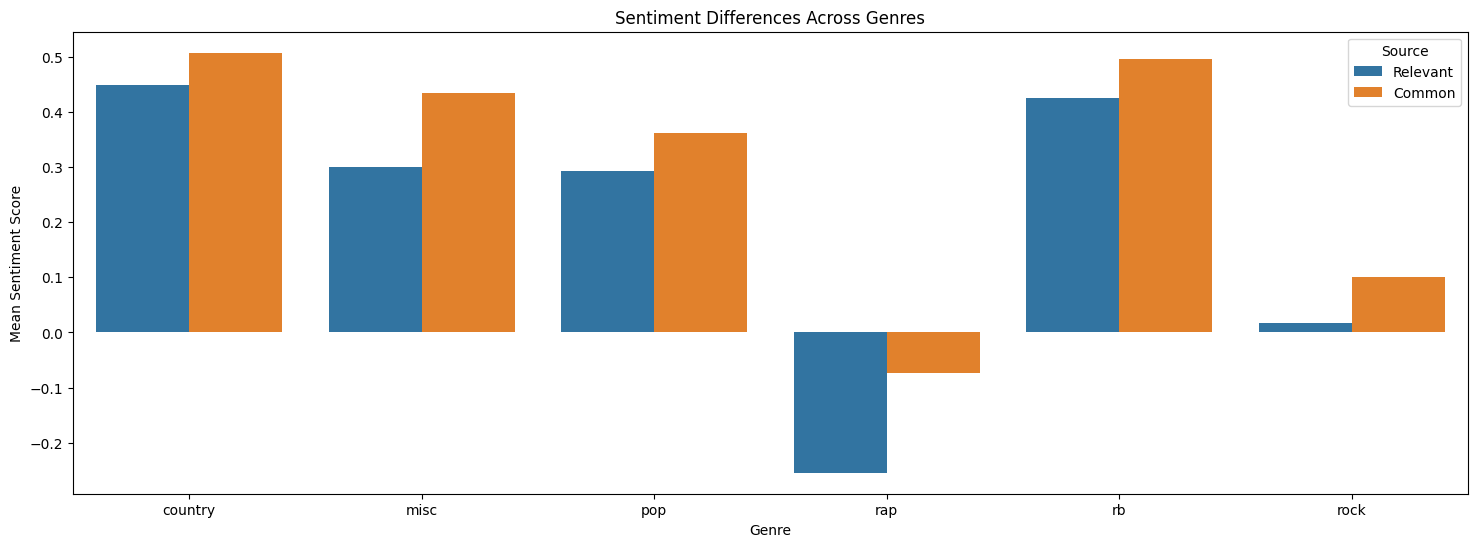

In [37]:
dataframes = [emojis_relevant_df_by_gender, emojis_common_df_by_gender]
titles = ['Relevant', 'Common']

sentiment_differences_across_genres(dataframes, titles)

#### Without Emojis

relevant VS common

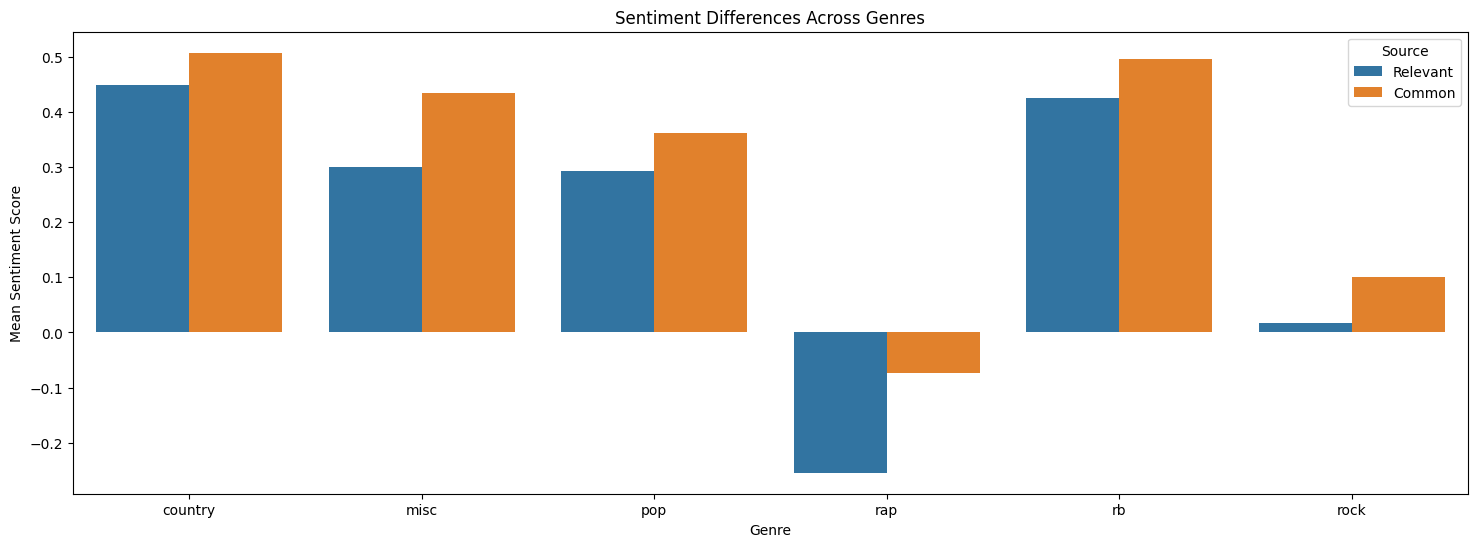

In [38]:
dataframes = [relevant_df_by_gender, common_df_by_gender]
titles = ['Relevant', 'Common']

sentiment_differences_across_genres(dataframes, titles)

#### Relevant

With and Without Emojis

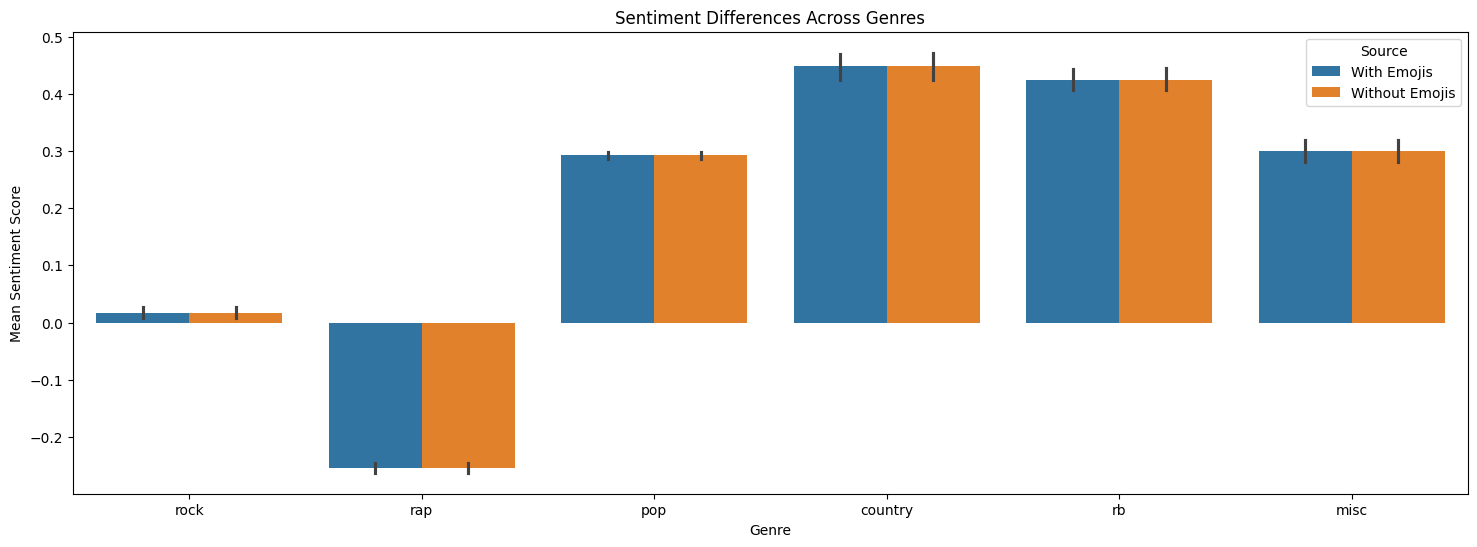

In [39]:
dataframes = [emojis_relevant_df, relevant_df]
titles = ['With Emojis', 'Without Emojis']

sentiment_differences_across_genres(dataframes, titles)

#### Common

With and Without Emojis

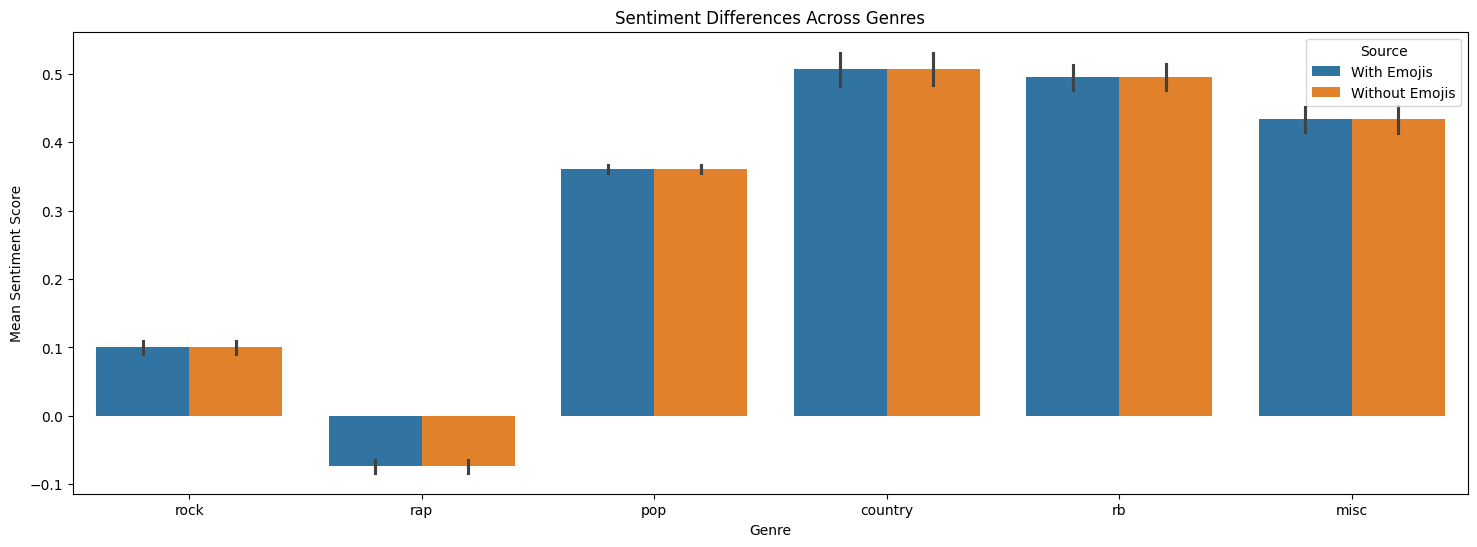

In [40]:
dataframes = [emojis_common_df, common_df]
titles = ['With Emojis', 'Without Emojis']

sentiment_differences_across_genres(dataframes, titles)

### TextBlob

In [41]:
def textblob_analysis(word_set, df):

    # filter lyrics
    df['filtered_lyrics'] = df['lyrics'].apply(lambda x: filter_lyrics(x, word_set))

    df['polarity'] = df['filtered_lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)    

    # for lyric in df['filtered_lyrics']:
    #     analysis = TextBlob(lyric)
    #     analysis.sentiment  	    

    # extract the label
    df['sentiment_label'] = np.select(
    [df['polarity'] < -0.2, df['polarity'] > 0.2],
    ['negative', 'positive'],
    default='neutral')
    
    df = df.drop("lyrics", axis=1)

    return df

    # return analysis.sentiment.polarity

### 1. With Emojis

#### 1.1 With Relevant words

In [42]:
emojis_relevant_df2 = textblob_analysis(relevant_words_set_with_emojis, preproc_with_emojis)
emojis_relevant_df2 

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mind one day pretend cause walk away ...,0.500000,positive
7519483,rap,rap hook want hurt want cry time fall make wan...,0.098214,neutral
4892808,pop,verse 1 tell find hard maybe feel know make go...,0.405952,positive
1584150,pop,get close know want leave ghost take certain f...,-0.091005,neutral
7639050,country,verse 1 end need way around turn soil take ste...,0.625000,positive
...,...,...,...,...
1702980,pop,know would old thing would tell chance tell si...,0.191667,neutral
4802970,rap,intro lil cash wah wah wah wah wah wah everyth...,0.067201,neutral
403929,rock,verse 1 bear inside home boy fight daddy heart...,0.183889,neutral


##### 1.1.1 BY GENDER

In [43]:
emojis_relevant_df2_by_gender = polarity_by_gender(emojis_relevant_df2)
emojis_relevant_df2_by_gender

,tag,polarity,sentiment_label
0,country,0.144805,neutral
1,misc,0.115153,neutral
2,pop,0.129144,neutral
3,rap,0.027417,neutral
4,rb,0.147658,neutral
5,rock,0.072268,neutral


#### 1.2. With Common words

In [44]:
emojis_common_df2 = textblob_analysis(common_words_set_with_emojis, preproc_with_emojis)
emojis_common_df2 

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mean change mind one day pretend caus...,0.093750,neutral
7519483,rap,kid rap hook everybody want hurt everybody wan...,0.069643,neutral
4892808,pop,verse 1 people tell change find hard explain m...,0.405952,positive
1584150,pop,warn try get close know want chain leave ghost...,-0.004932,neutral
7639050,country,verse 1 see end come never like need way even ...,0.044643,neutral
...,...,...,...,...
1702980,pop,know young would old many thing would tell cha...,0.119786,neutral
4802970,rap,intro lil cash everything future chorus lil li...,0.049088,neutral
403929,rock,verse 1 bear inside home young three boy fight...,0.162917,neutral


##### 1.2.1 BY GENDER

In [45]:
emojis_common_df2_by_gender = polarity_by_gender(emojis_common_df2)
emojis_common_df2_by_gender

,tag,polarity,sentiment_label
0,country,0.138542,neutral
1,misc,0.109868,neutral
2,pop,0.120002,neutral
3,rap,0.031292,neutral
4,rb,0.133279,neutral
5,rock,0.070786,neutral


### 2. Without Emojis

#### 2.1 With Relevant words

In [46]:
relevant_df2 = textblob_analysis(relevant_words_set_without_emojis, preproc_without_emojis)
relevant_df2 

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mind one day pretend cause walk away ...,0.500000,positive
7519483,rap,rap hook want hurt want cry time fall make wan...,0.098214,neutral
4892808,pop,verse 1 tell find hard maybe feel know make go...,0.405952,positive
1584150,pop,get close know want leave ghost take certain f...,-0.091005,neutral
7639050,country,verse 1 end need way around turn soil take ste...,0.625000,positive
...,...,...,...,...
1702980,pop,know would old thing would tell chance tell si...,0.191667,neutral
4802970,rap,intro lil cash wah wah wah wah wah wah everyth...,0.067201,neutral
403929,rock,verse 1 bear inside home boy fight daddy heart...,0.183889,neutral


##### 2.1.1 BY GENDER

In [47]:
relevant_df2_by_gender = polarity_by_gender(relevant_df2)
relevant_df2_by_gender

,tag,polarity,sentiment_label
0,country,0.144805,neutral
1,misc,0.115153,neutral
2,pop,0.129144,neutral
3,rap,0.027417,neutral
4,rb,0.147658,neutral
5,rock,0.072268,neutral


#### 2.2. With Common words

In [48]:
common_df2 = textblob_analysis(common_words_set_without_emojis, preproc_without_emojis)
common_df2 

,tag,filtered_lyrics,polarity,sentiment_label
id,,,,
535805,rock,say love mean change mind one day pretend caus...,0.093750,neutral
7519483,rap,kid rap hook everybody want hurt everybody wan...,0.069643,neutral
4892808,pop,verse 1 people tell change find hard explain m...,0.405952,positive
1584150,pop,warn try get close know want chain leave ghost...,-0.004932,neutral
7639050,country,verse 1 see end come never like need way even ...,0.044643,neutral
...,...,...,...,...
1702980,pop,know young would old many thing would tell cha...,0.119786,neutral
4802970,rap,intro lil cash everything future chorus lil li...,0.049088,neutral
403929,rock,verse 1 bear inside home young three boy fight...,0.162917,neutral


##### 2.3.1 BY GENDER

In [49]:
common_df2_by_gender = polarity_by_gender(common_df2)
common_df2_by_gender

,tag,polarity,sentiment_label
0,country,0.138542,neutral
1,misc,0.109868,neutral
2,pop,0.120002,neutral
3,rap,0.031292,neutral
4,rb,0.133279,neutral
5,rock,0.070786,neutral


## Comparissons

#### With Emojis

relevant VS common

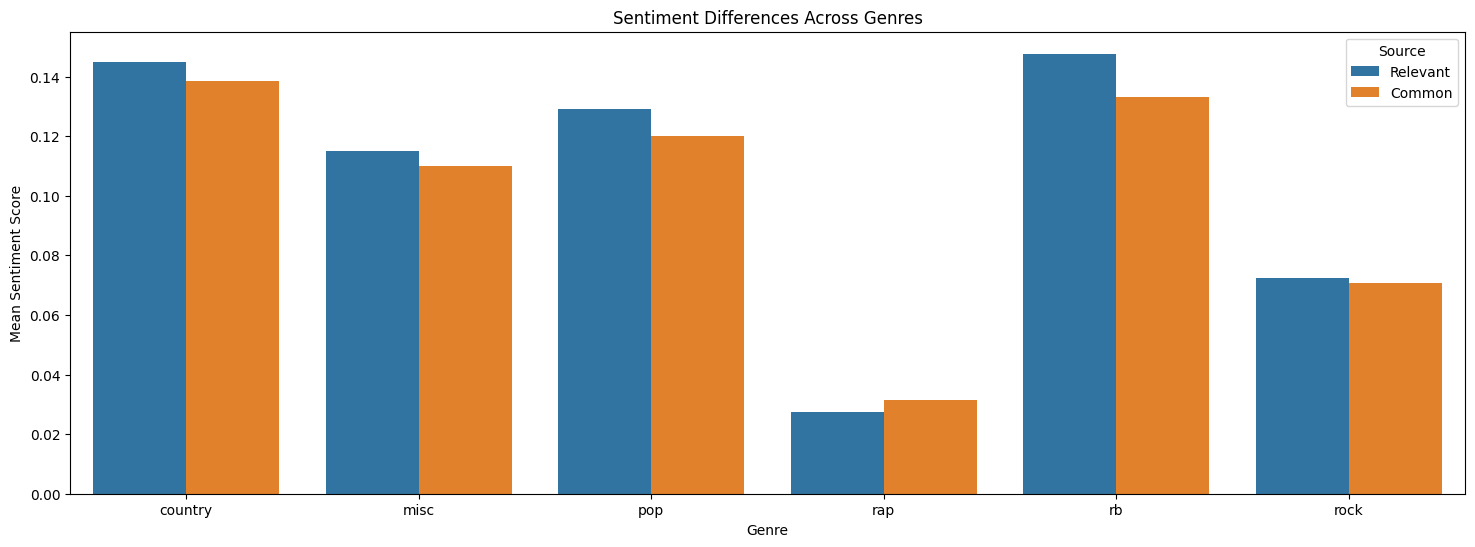

In [50]:
dataframes = [emojis_relevant_df2_by_gender, emojis_common_df2_by_gender]
titles = ['Relevant', 'Common']

sentiment_differences_across_genres(dataframes, titles)

#### Without Emojis

relevant VS common

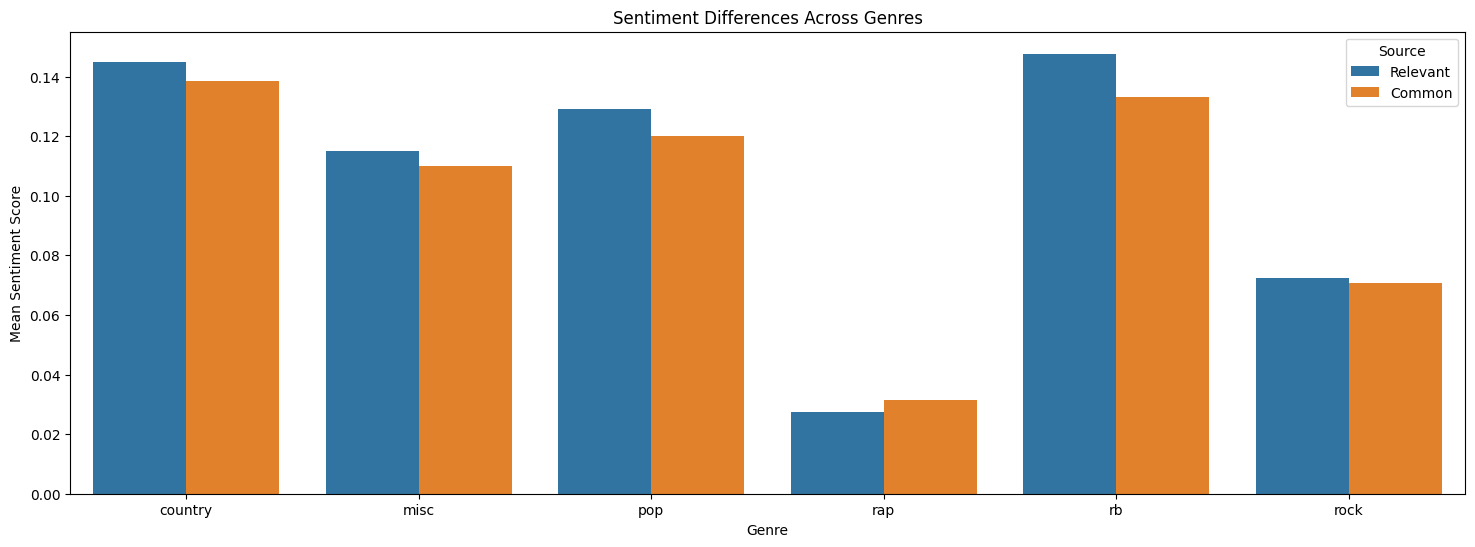

In [51]:
dataframes = [relevant_df2_by_gender, common_df2_by_gender]
titles = ['Relevant', 'Common']

sentiment_differences_across_genres(dataframes, titles)

#### Relevant

With and Without Emojis

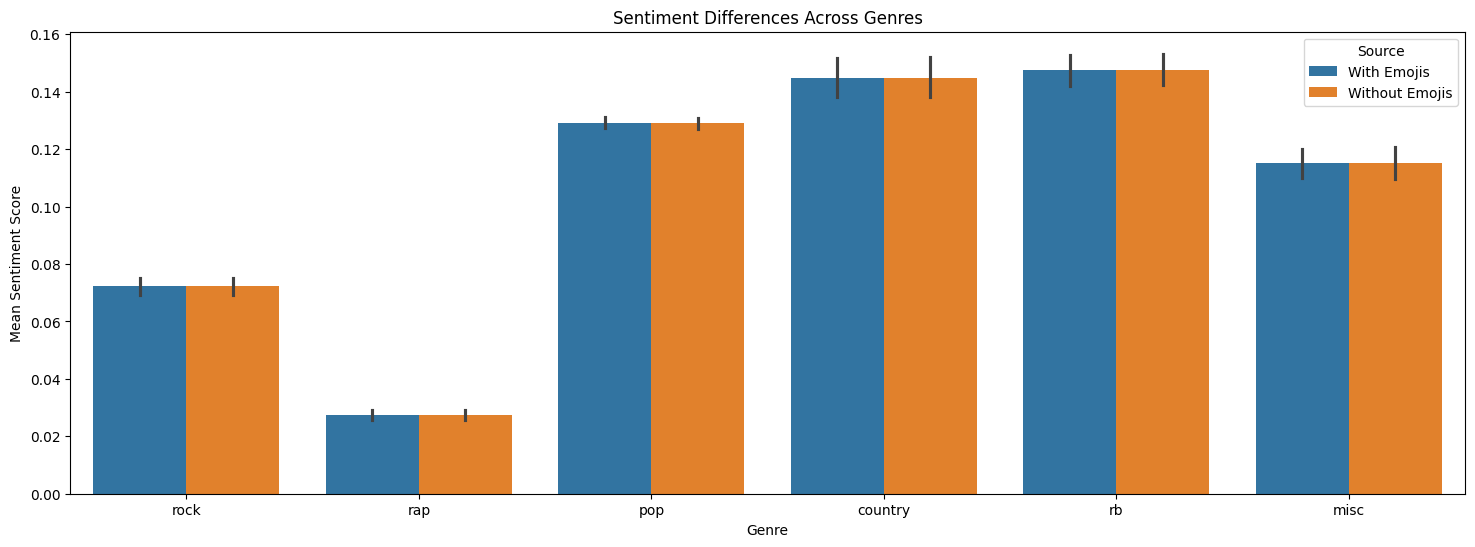

In [52]:
dataframes = [emojis_relevant_df2, relevant_df2]
titles = ['With Emojis', 'Without Emojis']

sentiment_differences_across_genres(dataframes, titles)

#### Common

With and Without Emojis

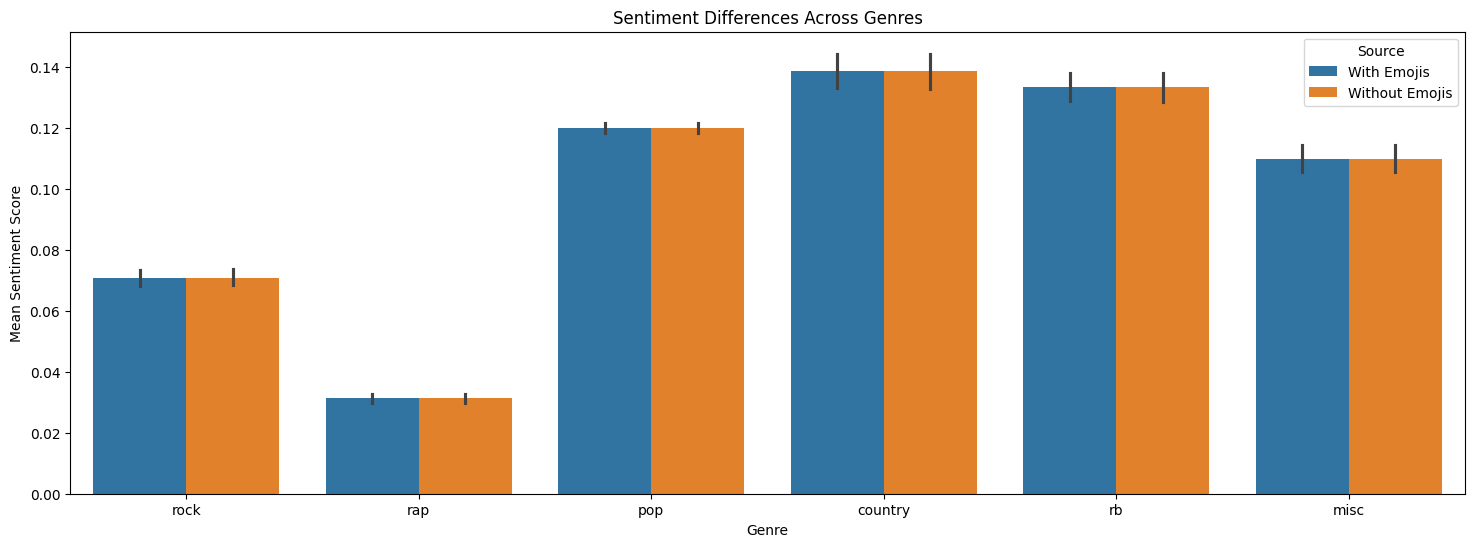

In [53]:
dataframes = [emojis_common_df2, common_df2]
titles = ['With Emojis', 'Without Emojis']

sentiment_differences_across_genres(dataframes, titles)

# **Explore**

### **Predominant sentiments in the lyrics of the songs of a specific musical genre:**

In [125]:
##### ines :)

### **Analyze Changes Over Years:**

- Group data by genre and year to see how sentiments change over time.
- Identify trends or shifts in emotional tones within genres across different years.

In [126]:
emojis_relevant_df[["year", "tag"]] = train[["year", "tag"]]
# emojis_relevant_common_df[["year", "tag"]] = train[["year", "tag"]]
# emojis_common_df[["year", "tag"]] = train[["year", "tag"]]

# stopwords_relevant_df[["year", "tag"]] = train[["year", "tag"]]
# stopwords_relevant_common_df[["year", "tag"]] = train[["year", "tag"]]
# stopwords_common_df[["year", "tag"]] = train[["year", "tag"]]

# emojis_relevant_df2[["year", "tag"]] = train[["year", "tag"]]
# emojis_relevant_common_df2[["year", "tag"]] = train[["year", "tag"]]
# emojis_common_df2[["year", "tag"]] = train[["year", "tag"]]

# stopwords_relevant_df2[["year", "tag"]] = train[["year", "tag"]]
# stopwords_relevant_common_df2[["year", "tag"]] = train[["year", "tag"]]
# stopwords_common_df2[["year", "tag"]] = train[["year", "tag"]]

In [132]:
emojis_relevant_df_copy = emojis_relevant_df.copy()

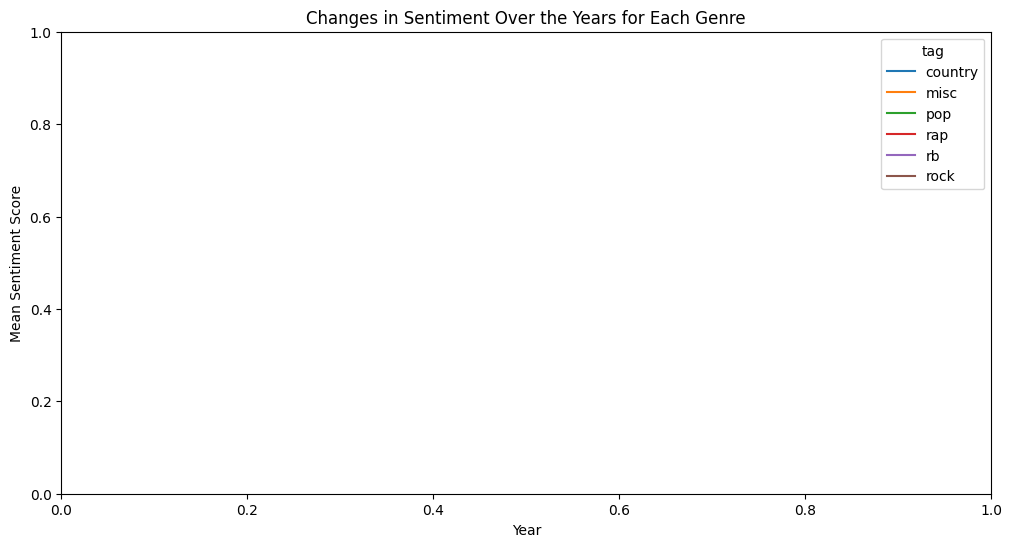

In [134]:
# Convert the 'sentiment' column to numeric
emojis_relevant_df_copy['sentiment_label'] = pd.to_numeric(emojis_relevant_df_copy['sentiment_label'], errors='coerce')

# Group by genre and year, then calculate the mean sentiment
genre_year_sentiment = emojis_relevant_df_copy.groupby(['tag', 'year'])['sentiment_label'].mean().reset_index()

# Visualize changes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sentiment_label', hue='tag', data=genre_year_sentiment)
plt.title('Changes in Sentiment Over the Years for Each Genre')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.show()

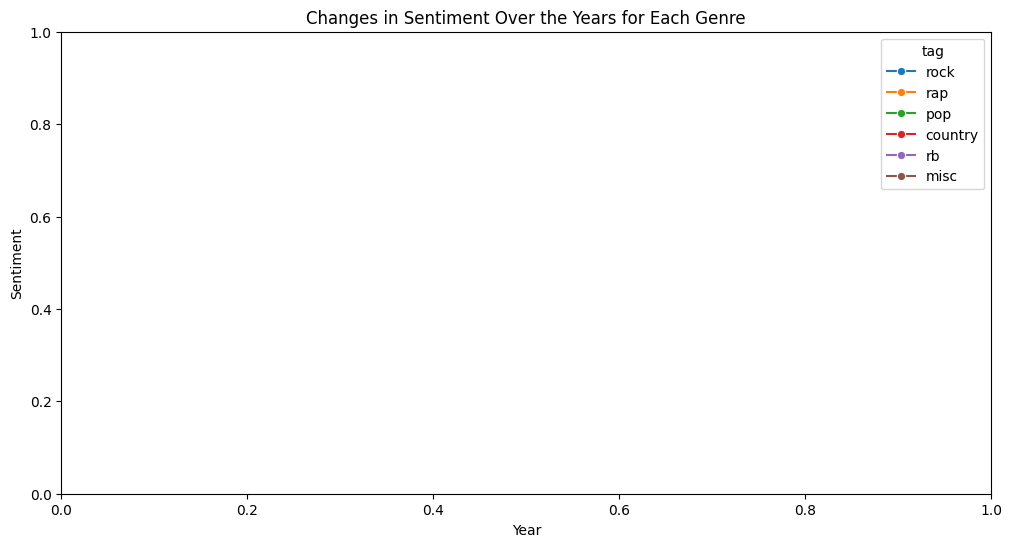

In [139]:
# Visualize changes over the years for each genre
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sentiment_label', hue='tag', data=emojis_relevant_df_copy, marker='o')
plt.title('Changes in Sentiment Over the Years for Each Genre')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sentiment', hue='genre', data=genre_year_sentiment)
plt.title('Changes in Sentiment Over the Years for Each Genre')
plt.xlabel('Year')
plt.ylabel('Mean Sentiment Score')
plt.show()

In [ ]:
# agrupar anos

In [ ]:
lyrics_preproc[]

### **Explore the Impact on Popularity:**

- Investigate whether sentiment correlates with song popularity (views).
- Analyze if certain sentiments are more appealing to audiences within and across genres.

### **Collaborations and Sentiment:**
   - How does the sentiment of a song vary when there are collaborations with other artists?
   - Do collaborations tend to result in songs with more positive or diverse sentiments?

### **Sentiment and Song Popularity:**
   - Is there a correlation between the sentiment of a song and its popularity (number of views)?
   - Do songs with certain sentiments tend to attract more views?

### **Lyrics Length and Sentiment:**
   - Is there a correlation between the length of song lyrics and the expressed sentiment?
   - Do shorter or longer lyrics tend to convey specific sentiments?

### **Cross-Genre Sentiment Analysis:**
   - Are there common sentiments shared between different genres, and how do they differ?
   - How do sentiments vary when songs from different genres collaborate or blend influences?

In [142]:
##### so depois da parte da ines :)

### **Impact of Lyrics on Views:**
- Is there evidence that certain sentiments in lyrics contribute to more views on the online music service?
- Do specific sentiments correlate with songs that go viral or become trending?

### **Sentiment and Musical Trends:**
- Are there patterns in sentiment that align with broader musical trends or movements?
- How does sentiment correlate with the evolution of music styles over time?

### By gender

In [ ]:
# ### country
# country_positive_df = labels_df[(labels_df['tag'] == "country") & (labels_df['compound'] > 0.2)]
# country_df = labels_df[labels_df['tag'] == "country"]
# country_overall = len(country_positive_df["compound"]) / len(country_df["compound"])*100
# display(country_overall)

73.16791690709752

In [ ]:
# ### misc
# misc_positive_df = labels_df[(labels_df['tag'] == "misc") & (labels_df['compound'] > 0.2)]
# misc_df = labels_df[labels_df['tag'] == "misc"]
# misc_overall = len(misc_positive_df["compound"]) / len(misc_df["compound"])*100
# display(misc_overall)

65.31914893617021

### Export Dataset

In [ ]:
# lyrics_train = pd.read_csv(r'C:\Users\bruna\Desktop\data_updated\lyrics_train.csv', index_col=-1)

In [ ]:
def sub_remove_new(x):

    emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\u2600-\u26FF\u2700-\u27BF]+", flags=re.UNICODE)

#     # Remove noise
#     x = re.sub(r"(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|^rt|http.+?", "", x, flags=re.MULTILINE)

#     # Remove html tags
#     x = re.sub(re.compile('<.*?>'), '', x)

#     # Remove email addresses
#     x = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', x)

    x = re.sub(r"([^0-9A-Za-z {}])".format(emoji_pattern.pattern), " ", x)



# import re

# # Unicode ranges for emojis
# emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]+", flags=re.UNICODE)

# for i in lyrics:
#     if emoji_pattern.search(i):
#         # print(i)
#         print(emoji_pattern.findall(i))

#### to utils

def sub_remove_1(x, emojis_removal=False):

        emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\u2600-\u26FF\u2700-\u27BF]+", flags=re.UNICODE)


        # if emojis_removal == True:

        #     # Remove noise
        x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t\n])|(\w+:\/\/\S+)|http.+?", " ", x, flags=re.MULTILINE)

        #     # Remove html tags
        #     x = re.sub(re.compile('<.*?>'), ' ', x)

        #     # Remove email addresses
        #     x = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', ' ', x) 

        # else:
        #     ####  [^0-9A-Za-z] - tirar est parte + tirar puntuaçao
        x = re.sub(r"([^0-9A-Za-z{} ])".format(emoji_pattern), " ", x)
    





emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\u2600-\u26FF\u2700-\u27BF]", flags=re.UNICODE)


import re

# Unicode ranges for emojis
emoji_pattern = re.compile("[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\u2600-\u26FF\u2700-\u27BF]", flags=re.UNICODE)

for i in lyrics:
    if emoji_pattern.search(i):
        # print(i)
        print(emoji_pattern.findall(i))


print(u"\U0001F600\U0001F64F\U0001F300\U0001F5FF\U0001F680\U0001F6FF\U0001F700\U0001F77F\U0001F780\U0001F7FF\U0001F800\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF")


emoji_pattern2 = re.compile("[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]+", flags=re.UNICODE)

test_0 = train["lyrics"].apply(sub_remove_0)
test_1 = train["lyrics"].apply(sub_remove_1)

emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # Emoticons
            u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # Transport & map symbols
            u"\U0001F700-\U0001F77F"  # Alchemical symbols                           
            u"\U0001F780-\U0001F7FF"  # Geometric shapes
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            "]+", flags=re.UNICODE)

count_0 = test_0.str.count(emoji_pattern.pattern).sum()
count_0

count_1 = test_1.str.count(emoji_pattern.pattern).sum()
count_1

In [ ]:
# emoji_pattern = re.compile("["
#     u"\U0001F600-\U0001F64F"  # Emoticons
#     u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
#     u"\U0001F680-\U0001F6FF"  # Transport & map symbols
#     u"\U0001F700-\U0001F77F"  # Alchemical symbols
#     u"\U0001F780-\U0001F7FF"  # Geometric shapes
#     u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
#     u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#     u"\U0001FA00-\U0001FA6F"  # Chess symbols
#     u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
#     u"\u2600-\u26FF"          # Miscellaneous Symbols
#     u"\u2700-\u27BF"          # Dingbat Symbols
#     "]", flags=re.UNICODE)


def sub_remove(x):
    # Remove noise, respectively...
    # email addresses
    # social media tags
    # characters that are not letters, numbers and (condionally) emojis
    # website links (both www and https)
    # html tags
    x = re.sub(r"(\b[A-Za-z0-9.%+-]+@[A-Za-z0-9.-]+.[A-Z|a-z]{2,}\b)", " ", x)
    x = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z{} ])|(\w+://\S+)|(http.+?)|(<.*?>)".format(emoji_pattern.pattern[1:-1]), 
               " ", x, flags=re.MULTILINE)
 
    return x

In [ ]:
def text_preprocessing(data, text_column, target=None, stp_removal=False, emojis_removal=True):
    text_data = data[text_column].copy()
    
    functions = [lower_case, 
                 expand_contractions, 
                 sub_remove, 
                 sub_spaces]

    if target is not None:
        if stp_removal==False:
            additional_functions = [tokenization,
                                    lemmatization,
                                    join_tokens]

        else:
            additional_functions = [tokenization if emojis_removal else tokenization_emojis,
                                    lemmatization,
                                    stopwords_removal,
                                    join_tokens]

        functions.extend(additional_functions)

    for function in functions:
        text_data = text_data.apply(function)

    text_data = pd.DataFrame(text_data, columns=[text_column])

    if target is not None:
        text_data[target] = data[target]
    
    return text_data

In [15]:
# for i in preproc_with_emojis['lyrics']:
#     if emoji_pattern.search(i):
#         # print(i)
#         print(emoji_pattern.findall(i))

In [14]:
# for i in preproc_without_emojis['lyrics']:
#     if emoji_pattern.search(i):
#         # print(i)
#         print(emoji_pattern.findall(i))

In [115]:
top_words = log_ratio(genre_freqs_without_emojis, None, total_words=3000, separate=True)

genre_word_lists = {}  # Dictionary to store words for each genre

for genre, words in top_words.items():
    genre_word_lists[genre] = [word[0] for word in words]

pop_relevant_words = genre_word_lists['pop']
rap_relevant_words = genre_word_lists['rap']
rock_relevant_words = genre_word_lists['rock']
country_relevant_words = genre_word_lists['country']
rb_relevant_words = genre_word_lists['rb']
misc_relevant_words = genre_word_lists['misc']

In [116]:
pop_df = vader_analysis(pop_relevant_words, preproc_without_emojis)
rap_df = vader_analysis(rap_relevant_words, preproc_without_emojis)
rock_df = vader_analysis(rock_relevant_words, preproc_without_emojis)
country_df = vader_analysis(country_relevant_words, preproc_without_emojis)
rb_df = vader_analysis(rb_relevant_words, preproc_without_emojis)
misc_df = vader_analysis(misc_relevant_words, preproc_without_emojis)

In [117]:
len(pop_relevant_words),len(rap_relevant_words),len(rock_relevant_words),len(country_relevant_words),len(rb_relevant_words),len(misc_relevant_words)

(500, 500, 500, 500, 500, 500)

In [120]:
# Assuming dfs is your list of dataframes and genres is your list of genres
dfs = [pop_df, rock_df, rap_df, country_df, rb_df, misc_df]
genres = ['pop', 'rock', 'rap', 'country', 'rb', 'misc']

# Initialize an empty dataframe
polarity_df = pd.DataFrame()

# Loop through each genre and dataframe
for genre, df in zip(genres, dfs):
    # Add the polarity column to the result dataframe with the genre as the column name
    polarity_df[genre] = df['polarity']

# Add the 'tag' column from the first dataframe to the result dataframe
polarity_df['tag'] = dfs[0]['tag']

# Now result_df should be your desired dataframe
polarity_df


,pop,rock,rap,country,rb,misc,tag
id,,,,,,,
535805,0.5859,0.0000,0.0000,0.0000,0.6369,0.0000,rock
7519483,-0.9942,-0.4767,-0.5423,-0.9300,0.8360,0.0000,rap
4892808,-0.3612,0.0000,0.0000,0.0000,0.0000,0.0000,pop
1584150,-0.8979,-0.5267,0.0000,0.0000,0.0772,0.0000,pop
7639050,0.7158,0.4717,0.0000,0.0000,0.0000,0.0000,country
...,...,...,...,...,...,...,...
1702980,0.7231,-0.2500,0.0000,0.0000,0.7579,0.0000,pop
4802970,0.9840,0.0000,-0.9991,0.0000,0.9062,0.0000,rap
403929,0.9819,-0.5574,0.0000,-0.2023,0.9803,0.0000,rock


- Ter um dataset de polaridade por genero
- Rows de todo o dataset
- Cada coluna é um género
- Ter a certeza que os índices batem certo
- A última coluna tem de ser a tag

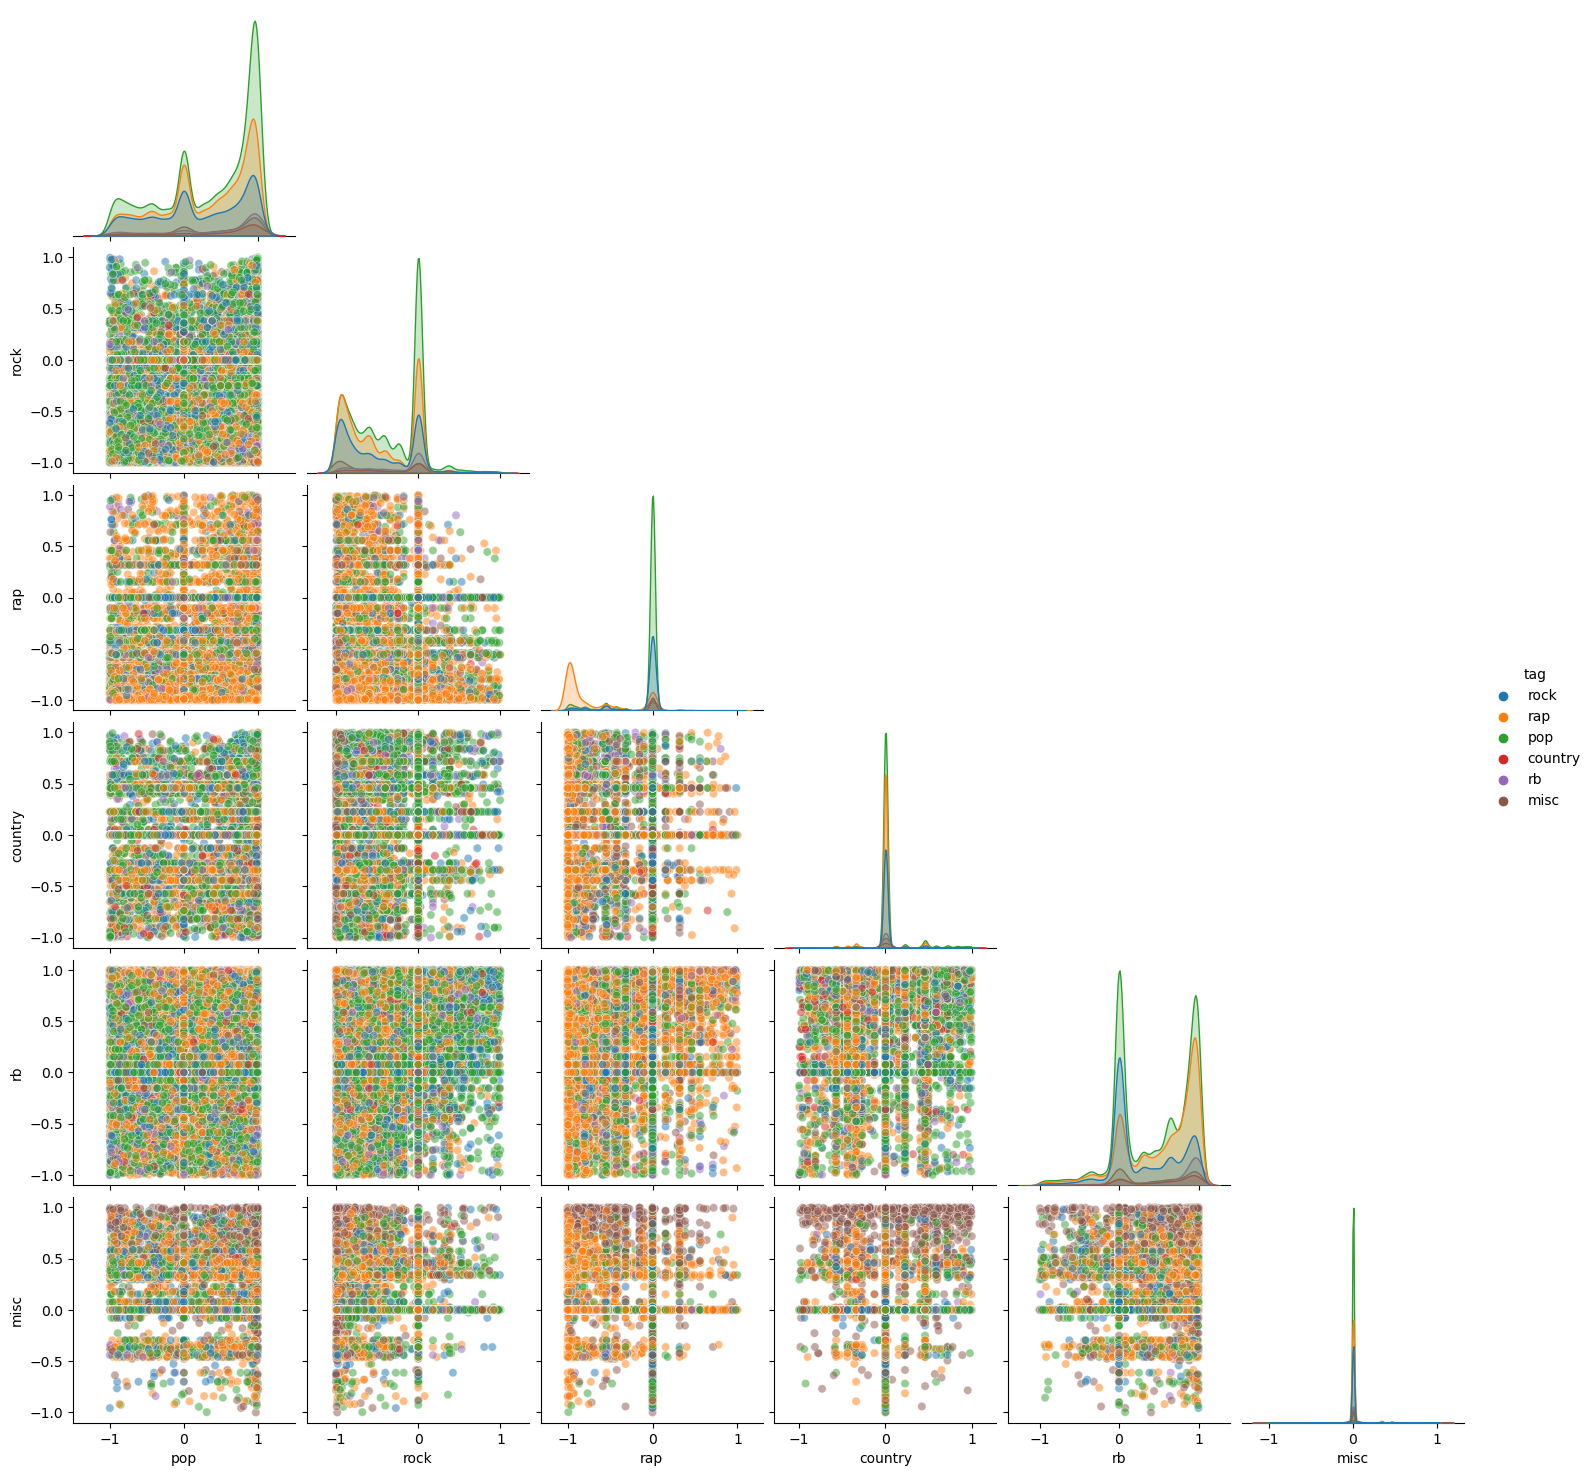

In [129]:
sns.pairplot(polarity_df, hue='tag', corner=True, plot_kws={'alpha': 0.5}, diag_kind='kde')